In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from data_processor import preprocess_dataframe

In [2]:
processed_data = pd.read_pickle("../models/data_processed.pkl")

In [3]:
data = preprocess_dataframe(processed_data, review_column='Full_Review')

In [4]:
data.to_pickle("../models/data_cleaned.pkl")

In [5]:
X= data['Full_Review']
y=data['Sentiment']

In [6]:
sentiment_counts = data["Sentiment"].value_counts().sort_index()

In [7]:
import matplotlib.pyplot as plt

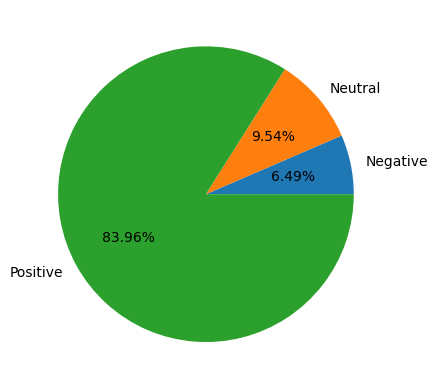

In [8]:
labels = ["Negative", "Neutral", "Positive"]
plt.pie(sentiment_counts,labels=labels,autopct="%.2f%%")
plt.show()

<h3>Since our data is imbalanced we downsize our positive sample</h3>

In [9]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from imblearn.under_sampling import RandomUnderSampler

In [11]:
rus = RandomUnderSampler()

In [12]:
X_reshaped = X.values.reshape(-1, 1) 

In [13]:
X_res, y_res = rus.fit_resample(X_reshaped, y)

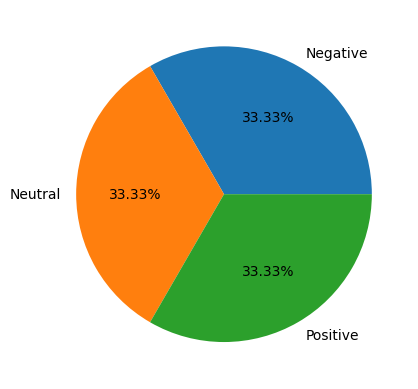

In [14]:
plt.pie(y_res.value_counts(),labels=labels,autopct="%.2f%%")
plt.show()

<h3>Divide data into train and test sets</h3>

In [15]:
X_res = X_res.ravel() 

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

<h3>Creating pipleine</h3>

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [18]:
pipeline = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('lrg',LogisticRegression())
])

In [19]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lrg', LogisticRegression())])

In [20]:
model = pipeline.fit(X_train,y_train)

<h3>Evaluate the model</h3>

In [21]:
from sklearn.metrics import accuracy_score, classification_report

In [22]:
y_pred = pipeline.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Model Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       312
           1       0.52      0.52      0.52       293
           2       0.73      0.78      0.75       277

    accuracy                           0.63       882
   macro avg       0.63      0.63      0.63       882
weighted avg       0.63      0.63      0.63       882



In [24]:
import joblib

In [25]:
joblib.dump(value=model,filename="../models/model.pkl")

['../models/model.pkl']